In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [33]:
Sucide_Ml=pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/master.csv')

In [4]:
Sucide_Ml.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [34]:
Sucide_Ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [35]:
Sucide_Ml.dropna()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [139]:
Sucide_Ml.nunique()

year                    32
sex                      2
age                      6
suicides/100k pop     4676
gdp_per_capita ($)    2219
generation               5
dtype: int64

In [137]:
Sucide_Ml['generation'].unique()

array(['Silent', 'G.I. Generation', 'Boomers', 'Millenials',
       'Generation Z'], dtype=object)

In [138]:
Sucide_Ml=Sucide_Ml.drop(labels=['population'],axis=1)

In [140]:
Sucide_Ml.isnull().sum()

year                  0
sex                   0
age                   0
suicides/100k pop     0
gdp_per_capita ($)    0
generation            0
dtype: int64

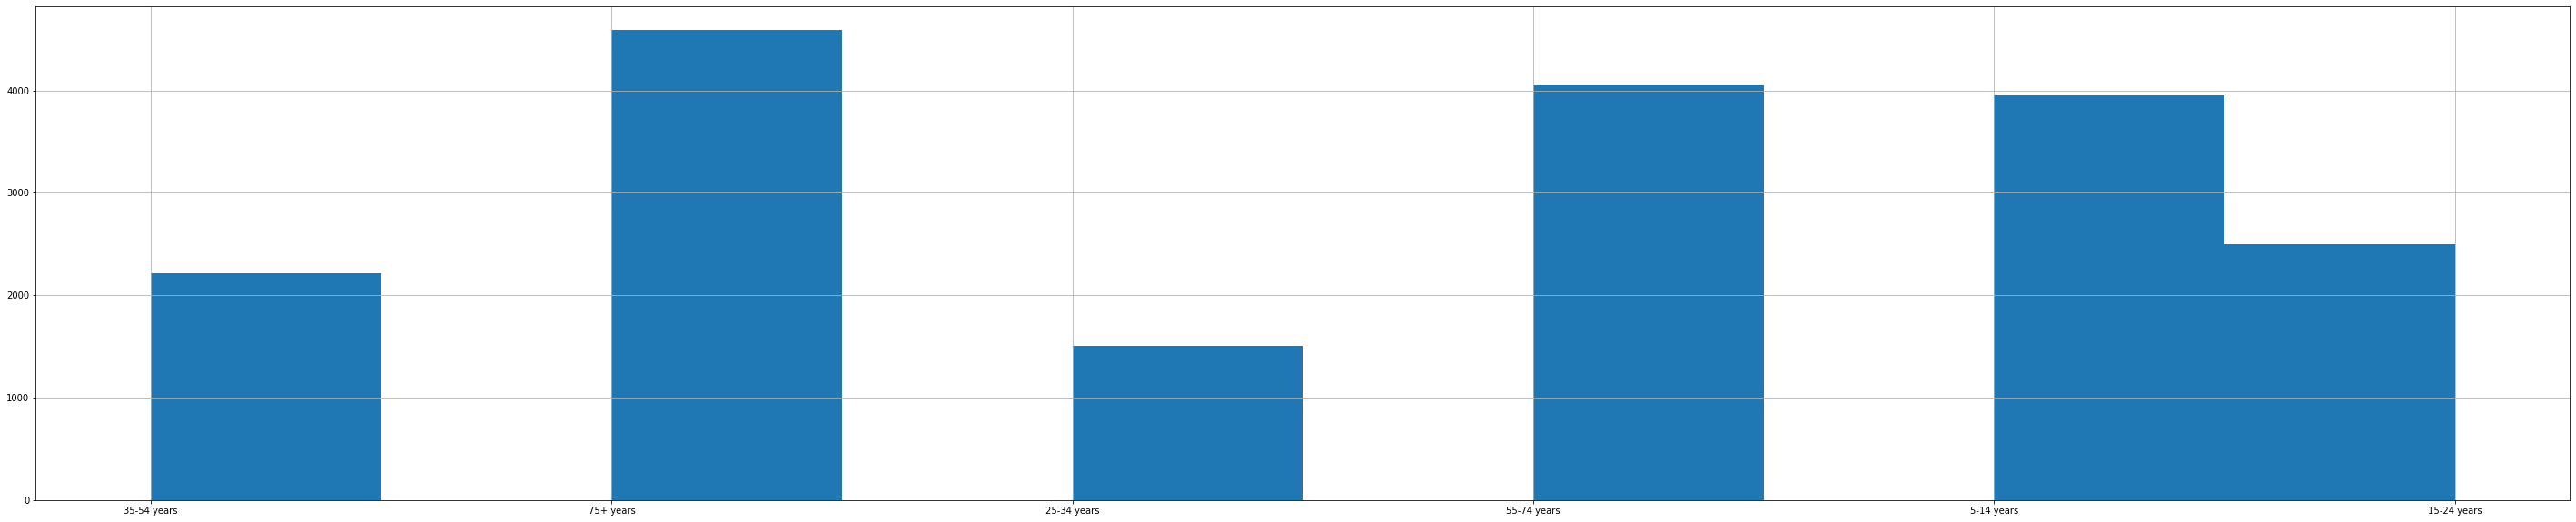

In [141]:
Sucide_Ml['age'].hist(figsize=(50,10))

In [142]:
Sucide_Ml.describe(include='all')

,year,sex,age,suicides/100k pop,gdp_per_capita ($),generation
count,18811.000000,18811,18811,18811.000000,18811.000000,18811
unique,NaN,2,6,NaN,NaN,5
top,NaN,female,75+ years,NaN,NaN,Silent
freq,NaN,9419,4590,NaN,NaN,6310
mean,2001.648397,NaN,NaN,13.065599,15184.592898,NaN
std,8.358293,NaN,NaN,20.193329,17299.278018,NaN
min,1985.000000,NaN,NaN,0.000000,251.000000,NaN
25%,1995.000000,NaN,NaN,0.550000,3136.000000,NaN
50%,2002.000000,NaN,NaN,5.050000,7612.000000,NaN
75%,2009.000000,NaN,NaN,16.585000,22804.000000,NaN


In [131]:
cat_cols=['year','generation','sex','age']
outlier_cols=['population']

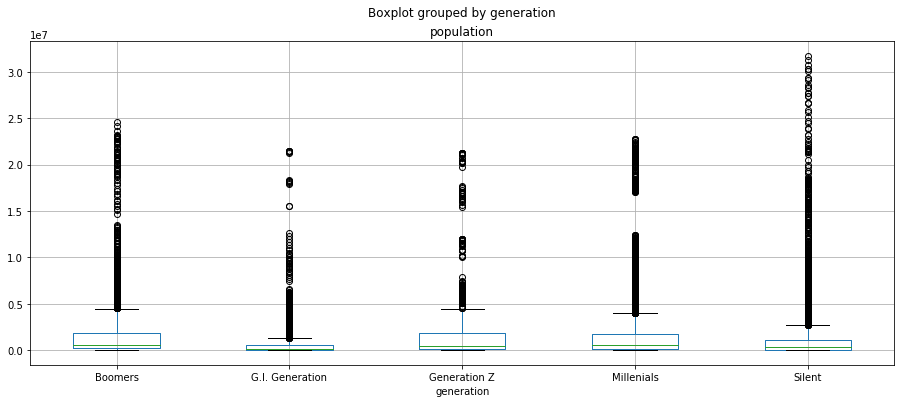

In [135]:
Sucide_Ml.boxplot(column='population',by='generation',figsize=(15,6))

In [134]:
## Deleteing outliers
con1=Sucide_Ml['population']>3
con2=Sucide_Ml['generation']=='Generation X'
Delete=Sucide_Ml[con1&con2].index
Sucide_Ml=Sucide_Ml.drop(Delete)


In [143]:
cat_cols=['year','generation','sex','age']
Sucide_Ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18811 entries, 1 to 27819
Data columns (total 6 columns):
year                  18811 non-null int64
sex                   18811 non-null object
age                   18811 non-null object
suicides/100k pop     18811 non-null float64
gdp_per_capita ($)    18811 non-null int64
generation            18811 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [145]:
Sucide_Ml.corrwith(Sucide_Ml['suicides/100k pop'], axis=0)

year                 -0.106941
suicides/100k pop     1.000000
gdp_per_capita ($)   -0.017224
dtype: float64

In [163]:
## checking the coreletaion with continuous varibale with the categorical varibale conducting Annova 

from scipy.stats import f_oneway

for i in cat_cols:
    print('/'*60)
    Annovactegory=Sucide_Ml.groupby(i)['suicides/100k pop'].apply(list)
    Annovaresult=f_oneway(*Annovactegory)
    print("The p values is ", Annovaresult[1])
    if(Annovaresult[1]<0.05):
        print(i,"is coreleated with target variable")
    else:
        print(i,"is not coreleated with target variable")
        



////////////////////////////////////////////////////////////
The p values is  1.363471138472834e-41
year is coreleated with target variable
////////////////////////////////////////////////////////////
The p values is  0.0
generation is coreleated with target variable
////////////////////////////////////////////////////////////
The p values is  0.0
sex is coreleated with target variable
////////////////////////////////////////////////////////////
The p values is  0.0
age is coreleated with target variable


In [151]:
Sucide_Ml_csv=pd.DataFrame()

Sucide_Ml_csv.to_csv('C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/Python Datasets/Sucide_Ml_csv.csv')

In [159]:
Sucide_Ml['generation'].unique()

array(['Silent', 'G.I. Generation', 'Boomers', 'Millenials',
       'Generation Z'], dtype=object)

In [161]:
mapping={'Silent':1,'G.I. Generation':2,'Boomers':3,'Millenials':4,'Generation Z':5}

Sucide_Ml['generation']=Sucide_Ml['generation'].map(mapping)

In [175]:
Sucide_Ml

,year,sex,age,suicides/100k pop,gdp_per_capita ($),generation
1,1987,1,4,5.19,796,1
3,1987,1,6,4.59,796,2
4,1987,1,3,3.28,796,3
5,1987,0,6,2.81,796,2
6,1987,0,4,2.15,796,1
...,...,...,...,...,...,...
27814,2014,0,3,5.92,2309,4
27816,2014,0,6,2.58,2309,1
27817,2014,1,1,2.17,2309,5
27818,2014,0,1,1.67,2309,5


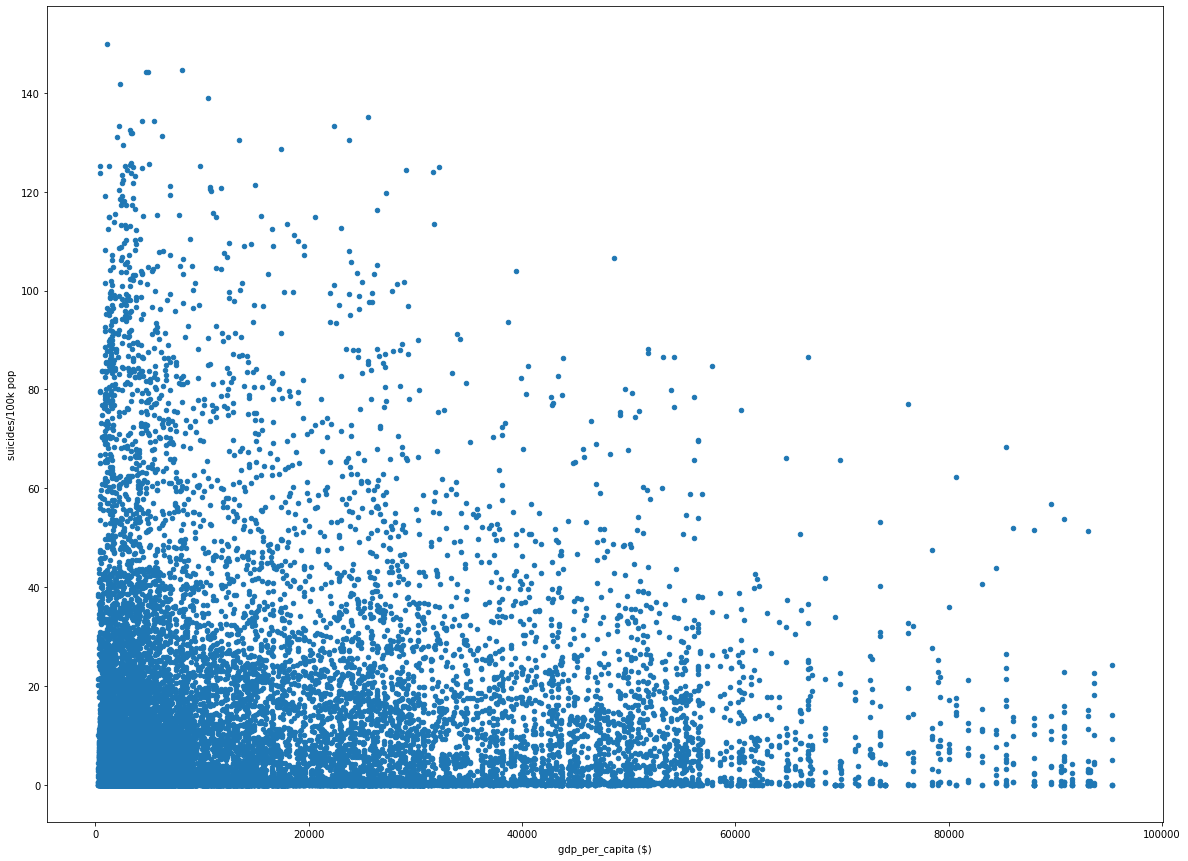

In [174]:
Sucide_Ml.plot.scatter(x='gdp_per_capita ($)',y='suicides/100k pop', figsize=(20,15))

In [173]:
## Deleteing outliers
con1=Sucide_Ml['suicides/100k pop'].between(60,80)
con2=Sucide_Ml['gdp_per_capita ($)']>93000
Delete=Sucide_Ml[con1&con2].index
Sucide_Ml=Sucide_Ml.drop(Delete)

In [264]:
Sucide_Ml[Sucide_Ml['suicides/100k pop']==0].head(5)

,year,sex,age,suicides/100k pop,gdp_per_capita ($),generation
10,1987,0,5,0.0,796,2
34,1989,0,6,0.0,833,2
44,1992,0,1,0.0,251,4
45,1992,0,6,0.0,251,2
46,1992,1,1,0.0,251,4


In [262]:
M_edian=Sucide_Ml['suicides/100k pop'].median()
print(M_edian)

5.05


In [265]:
Sucide_Ml['suicides/100k pop'][Sucide_Ml['suicides/100k pop']==0.0]=M_edian

In [266]:
Sucide_Ml[Sucide_Ml['suicides/100k pop']==0.0].count()

year                  0
sex                   0
age                   0
suicides/100k pop     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [267]:
## Train and test split

from sklearn.model_selection import train_test_split
from sklearn import metrics

Target='suicides/100k pop'
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[Target].values
y=Sucide_Ml[predictors].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=5012)




In [268]:
## linaer Rigression

from sklearn.linear_model import LinearRegression


Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.32, random_state=51)

mlr=LinearRegression()
predictmodel=mlr.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print("Thr R2 Value",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

Thr R2 Value 0.29403858416799056
Accuracy on Test Data: -354.03961390241153


In [230]:
##
from sklearn.linear_model import Lasso

Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.32, random_state=51)

lass=Lasso(alpha=0.01,max_iter=600,tol=0.0001)
predictmodel=lass.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" Accuracy on Test Data: ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

The R squared is 0.292830993594589
 Accuracy on Test Data:  -inf


In [229]:
## Ridge Reggresion
from sklearn.linear_model import Ridge

Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.32, random_state=51)



rig=Ridge(alpha=0.01)
predictmodel=rig.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))





The R squared is 0.29283380518922564
 The Accuracy score  -inf


In [226]:
### Elastic Net regression

from sklearn.linear_model import ElasticNet


Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.21, random_state=510000)



Enet=ElasticNet(alpha=0.01)
pedictmodel=Enet.fit(X_train,y_train)
predictions=pedictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))


The R squared is 0.36669646089236085
 The Accuracy score  -inf


The R squared is 0.3675132730371369
 The Accuracy score  -inf


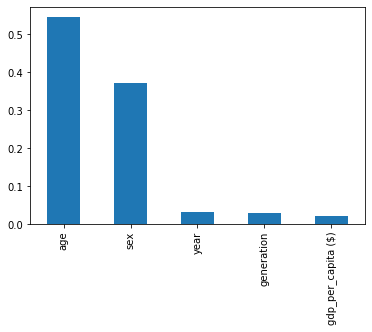

In [232]:
## Decsion tree

from sklearn.tree import DecisionTreeRegressor




Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.21, random_state=510)




dtree=DecisionTreeRegressor( max_depth=5,criterion='mse')
predictmodel=dtree.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

feautre_importance=pd.Series(predictmodel.feature_importances_, index=predictors)
feautre_importance.nlargest(5).plot(kind='bar')



The R squared is 0.376945901682888
 The Accuracy score  -inf


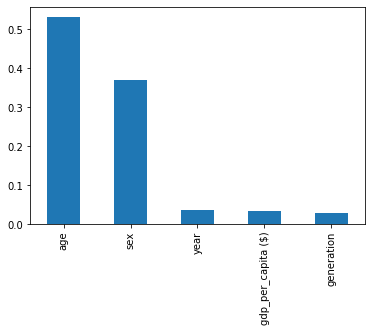

In [236]:
### Random foreest Regressor

from sklearn.ensemble import RandomForestRegressor



Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=92450)



rgf=RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=5)
predictmodel=rgf.fit(X_train,y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

feautre_importance=pd.Series(predictmodel.feature_importances_,index=predictors)
feautre_importance.nlargest(10).plot(kind='bar')



The R squared is 0.37944069992680907
 The Accuracy score  -inf 5


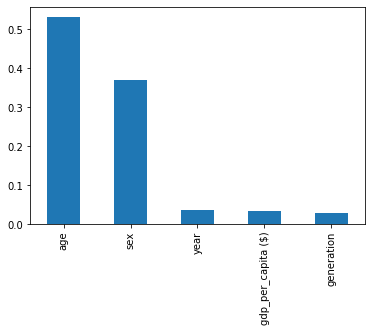

In [240]:
## Ada Boost Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor




Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=51000)



dtree=DecisionTreeRegressor(max_depth=5)
Ada =AdaBoostRegressor( base_estimator=dtree,n_estimators=300,learning_rate=0.002)
Predictmodel=Ada.fit(X_train,y_train)
predictions=Predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))


feautre_importance=pd.Series(predictmodel.feature_importances_,index=predictors)
feautre_importance.nlargest(10).plot(kind='bar')



The R squared is 0.4553694160347701
 The Accuracy score  -inf


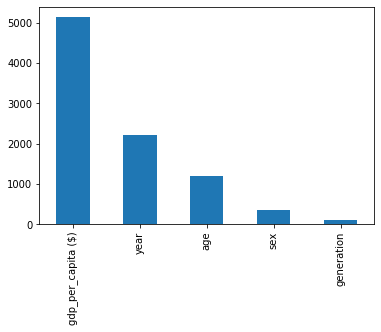

In [244]:
## Light BGM
from lightgbm import LGBMRegressor



Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=51000)



lgb=LGBMRegressor(learning_rate=0.01,n_estimators=300,max_depth=-1)
predictmodel=lgb.fit(X_train, y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

feautre_importance=pd.Series(predictmodel.feature_importances_,index=predictors)
feautre_importance.nlargest(10).plot(kind='bar')



[17:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
The R squared is 0.4224500526837691
 The Accuracy score  -inf


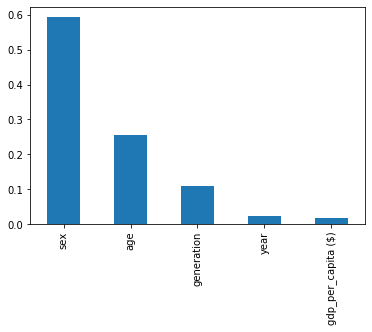

In [249]:
## Xgboost 

from xgboost import XGBRegressor


Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.31, random_state=45890)



xgb=XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=400, objective='reg:linear', booster='gbtree')
predictmodel=xgb.fit(X_train, y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))

feautre_importance=pd.Series(predictmodel.feature_importances_,index=predictors)
feautre_importance.nlargest(10).plot(kind='bar')


In [252]:
## KNN Regressor

from sklearn.neighbors import KNeighborsRegressor


Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.31, random_state=45890)


knn=KNeighborsRegressor(n_neighbors=3)
predictmodel=knn.fit(X_train, y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))




The R squared is 0.6226970564484413
 The Accuracy score  nan


In [259]:
## SVR

from sklearn import svm

Target=['suicides/100k pop']
predictors=['year','sex','age','gdp_per_capita ($)','generation']
X=Sucide_Ml[predictors].values
y=Sucide_Ml[Target].values
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.35, random_state=5200)


SVRl=svm.SVR(kernel='rbf',gamma=0.01,C=3)
predictmodel=SVRl.fit(X_train, y_train)
predictions=predictmodel.predict(X_test)
print("The R squared is",metrics.r2_score(y_train,predictmodel.predict(X_train)))
print(" The Accuracy score ",100- (np.mean(np.abs((y_test - predictions) / y_test)) * 100))




The R squared is 0.05779016439829465
 The Accuracy score  -inf
